In [26]:
import pandas as pd
import numpy as np
import re
import nltk

In [1559]:
train = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\LeaveOneOut\leave_trac_train.csv')
test = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\UniformClasses\V2\test\trac_test.csv', sep='\t')

In [1560]:
train.dropna(inplace=True)
# indices_to_keep_train = ~train.isin([np.nan, np.inf, -np.inf]).any(1)
# train = train[indices_to_keep_train].astype(np.float64)

In [1561]:
test.dropna(inplace=True)
# indices_to_keep_test = ~test.isin([np.nan, np.inf, -np.inf]).any(1)
# test = test[indices_to_keep_test].astype(np.float64)

In [1562]:
train = train[['Text','Class']]
train

,Text,Class
0,rt justdoitrob kaaarlizzi bitch love laughlol,OFF
1,color everi day sunday,NOT
2,ur brother look queer ugli,OFF
3,sister bitch dont get way,OFF
4,pornandroidiphoneipadsexxxx hairi hairi pussi,OFF
...,...,...
79481,"""\n\nAgree. The example of the Garamond italic...",NOT
79482,"Please see WP:BRD, I'd much rather hammer ou...",NOT
79483,"""\n\nIndeed, even her last name used for the a...",NOT
79484,i saw what you did and didn't realize the erro...,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

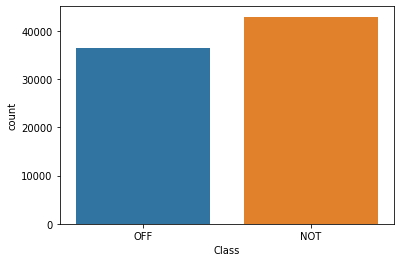

In [1563]:
import seaborn as sns
sns.countplot('Class',data=train)

In [1564]:
test = test[['Text','Class']]
test

,Text,Class
0,https://www.youtube.com/watch?v=4iejjszkflo,NOT
1,shame on society & culture trying to justify t...,NOT
2,"just wanna say, there is no gay gene. you can ...",NOT
3,"well, if a one twin struggles with self confid...",NOT
4,i am an identical twin and we are both homosex...,NOT
...,...,...
1195,@hellocreep no fool you comment makes no sense...,NOT
1196,at least cows give you milk and other dairy pr...,NOT
1197,that's why law is called an ass..!,NOT
1198,the feminist definition of equality - whatever...,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

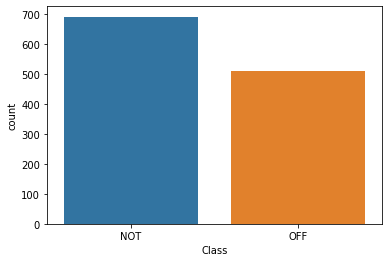

In [1565]:
sns.countplot('Class',data=test)

In [1566]:
# text = data['Text']
# label = data['Class']

In [1567]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(text, label, random_state=42)
# print(len(x_train), len(y_train))
# print(len(x_test), len(y_test))

In [1568]:
x_train = train['Text']
y_train = train['Class']
x_test = test['Text']
y_test = test['Class']

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

79486 79486
1200 1200


In [1569]:
# from sklearn.feature_extraction.text import CountVectorizer

# count = CountVectorizer(stop_words='english', ngram_range=(1,5))
# x_train_vectorizer=count.fit_transform((x_train).values.astype('str'))


In [1570]:
# x_test_vectorizer=count.transform(x_test.values.astype('str'))
# x_train_vectorizer.toarray()

In [1571]:
# count.vocabulary_

In [1572]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf = TfidfTransformer()
# x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

# # x_train_tfidf.toarray()
# x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [1573]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [1574]:
# SVM
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,
    max_iter=5, tol=None)),
])

In [1575]:
text_clf.fit(x_train, y_train)
predicted = text_clf.predict(x_test)
np.mean(predicted == y_test)

0.5916666666666667

In [1576]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
target_names=['NOT','OFF'], digits=4))

metrics.confusion_matrix(y_test, predicted)



              precision    recall  f1-score   support

         NOT     0.5858    0.9899    0.7360       690
         OFF     0.7941    0.0529    0.0993       510

    accuracy                         0.5917      1200
   macro avg     0.6899    0.5214    0.4176      1200
weighted avg     0.6743    0.5917    0.4654      1200



array([[683,   7],
       [483,  27]], dtype=int64)